## Sensitivity and Specificity
**Sensitivity** measures the <u>proportion of positive results</u> out of <u>all truly positive samples.</u> In other words, a test's sensitivity is its ability to correctly identify those with the disease (the true positives) while minimizing the <u>number of false negative results</u>.

**Specificity** measures the <u>proportion  of negative test result</u> out of <u>all truly negative samples.</u> In other words, a test's specificity is its ability to correctly identify those without the disease (the true negatives) while minimizing false positive results.

**False results** are also known as testing errors. The consequences of atesting error- a false positive or a false negative- are not equivalent.

The following is the so-called confusion matrix.

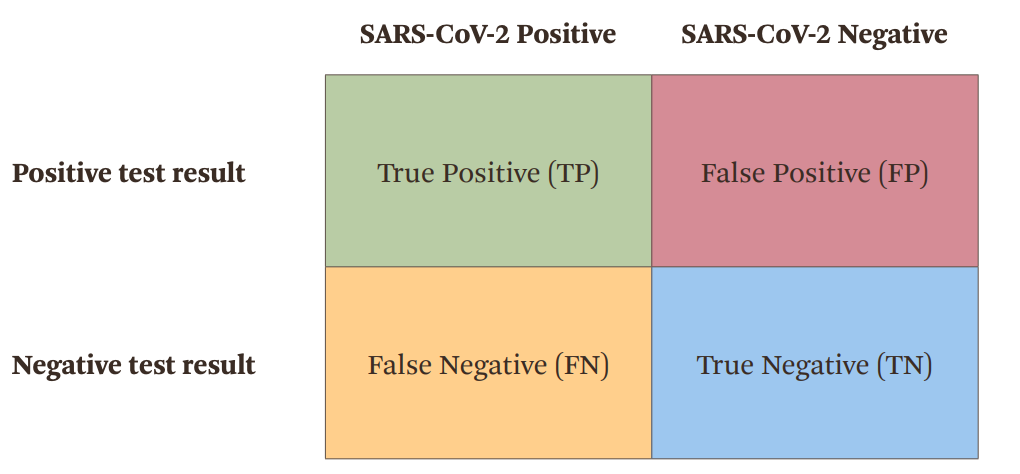

Mthematically: 
+ Sensitivity = TP/(TP+FN)
+ Specificity = TN/(TN+FP)

## ROC Curve

The **Receiver Operating Characteristic (ROC) curve** is a graphical representation used to evaluate the performance of a binary classifier. When we have a sequence of predicted probabilities for two classes, we need to apply a threshold to classify them. Different thresholds lead to different classification results, and for each result, we can calculate sensitivity and specificity. The ROC curve is generated by plotting the **true positive rate (TPR)** against the **false positive rate (FPR)** (which is 1-specificity) for every possible threshold (or, more practically, at selected intervals). This provides a visual way to assess the trade-offs between TPR and FPR across varying threshold values.

In binary classification, class predictions for each instance are often based on a **continuous random variable**  $X$ , which represents a "score" computed for the instance (e.g., the estimated probability in logistic regression). The variable  $X$  indicates the likelihood of being classified as "positive". Since we have two groups (true positives and true negatives), the distribution of  $X$  differs between these groups, with densities denoted as  $f_1$  for the positive class and  $f_2$  for the negative class.

The true True Positive Rate (TPR) at a threshold  $T$  is given by:
$$
TPR(T) = \int_{T}^\infty f_1(x)  dx
$$

Similarly, the False Positive Rate (FPR) is expressed as:
$$
FPR(T) = \int_{T}^\infty f_2(x)  dx
$$

The ROC curve is generated by plotting  $TPR(T)$  versus  $FPR(T)$ , with  $T$  as the varying parameter.

The following example comes from [wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

> imagine that the blood protein levels in diseased people and healthy people are normally distributed with means of 2 g/dL and 1 g/dL respectively. A medical test might measure the level of a certain protein in a blood sample and classify any number above a certain threshold as indicating disease. The experimenter can adjust the threshold (green vertical line in the figure), which will in turn change the false positive rate. Increasing the threshold would result in fewer false positives (and more false negatives), corresponding to a leftward movement on the curve. The actual shape of the curve is determined by how much overlap the two distributions have.
> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/ROC_curves.svg/600px-ROC_curves.svg.png)


While the Receiver Operating Characteristic (ROC) curve and its Area Under the Curve (AUC) are useful for assessing the overall performance of a binary classifier by focusing on the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity), they ***do not provide any information*** about other important metrics such as **precision** and **negative predictive value (NPV).**

1. **Precision** (or Positive Predictive Value) measures the proportion of true positives among all positive predictions. A high precision means that when the classifier predicts a positive, it’s usually correct. The ROC curve does not consider how well the model distinguishes positives from negatives in terms of predicted labels.

2. **Negative Predictive Value (NPV)** is the proportion of true negatives among all negative predictions. Like precision, this metric is not captured by the ROC curve.


A high sensitivity (e.g. 0.9) and specificity (e,g. 0.9) might correspond to low values of precision and negative predictive value. See the matic below




In [6]:
#|echo: false
%%R

matrix_data <- matrix(c(9, 1, 100, 900), nrow=2,dimnames=list(predict=c("positive","negative"),true=c("positive","negative")))

matrix_data

          true
predict    positive negative
  positive        9      100
  negative        1      900


We know that sensitivity=0.9 and specificity=0.9 but precision is 9/100 and NPV is 900/901.

## AUC

AUC is the area under the curve. How to interpret it?

It is equal to the probability that a classifier will rank a **randomly chosen** positive instance **higher** than a **randomly chosen** negative one.

> In other words, when given one randomly selected positive instance and one randomly selected negative instance, AUC is the probability that the classifier will be able to tell which one is which.

Mathematically, we can interpret it by the following:
Let
$$
\begin{aligned}
&TPR(T): T \rightarrow y(x)\\
&FPR(T): T \rightarrow x
\end{aligned}
$$
Then (the integral boundaries are reversed as large threshold 
T has a lower value on the x-axis)
$$
\begin{aligned}
AUC=&\int_0^1 TPR(FPR^{-1}(x))dx\\
=&\int_{\infty}^{-\infty} TPR(T)FPR^\prime (T)dT \\
=&\int_{\infty}^{-\infty} TPR(T)f_2(T)dT\\
=&\int_{\infty}^{-\infty} \int_{T}^\infty f_1(T^\prime)dT^\prime f_2(T)dT\\
=&\int_{\infty}^{-\infty} \int_{-\infty}^\infty I(T^\prime>T) f_1(T^\prime)dT^\prime f_2(T)dT\\
=&P(X_1>X_2)
\end{aligned}
$$ {#eq-AUC_prob_meaning}

### Connection between AUC and Mann-Whitney U statistic



In binary classification models, once the model fitting is complete, we obtain a set of scores for each sample, indicating the likelihood of belonging to a particular class. By **adjusting the threshold**, we can calculate the corresponding True Positive Rate (TPR) and False Positive Rate (FPR). In fact, we can order these scores from largest to smallest, and **only when the threshold takes on these specific values will the TPR and FPR change**.



Starting from the highest score, we **progressively lower the threshold**. The first threshold is set at **$p_{n_1+n_2}$**, where all samples fall below this value, resulting in both TPR and FPR being zero. As we adjust the threshold, either the TPR increases by one unit $(1/n_1)$ or the FPR increases by one unit $(1/n_2)$, until they both reach $(1,1)$ (at this point, the threshold is 0, meaning we need to set $n_1+n_2+1$ thresholds). Consequently, the Area Under the Curve (AUC) can be calculated using the following formula. The key is that with each step to the right, the number of upward steps already taken equals the number of Y-values greater than the most recent X-value (where X-values represent FPR and Y-values represent TPR):


$$
AUC=\frac{1}{n_1n_2}\sum_i\sum_j\mathbf{1}(X_i<Y_j)
$$ {#eq-AUC}


Here, $\sum_i\sum_j\mathbf{1}(Y_i<X_j)$ corresponds to the well-known Wilcoxon-Mann-Whitney $U$ statistic:
$$
AUC=\frac{U}{n_1n_2}
$$


However, the time complexity of this equation is relatively high, $\mathcal{O}(n_1 n_2)$, so we need to find a more efficient way to calculate it.



Since
$$
U=\sum_{i\in P}rank_i - \frac{n_1(n_1+1)}{2} = W - \frac{n_1(n_1+1)}{2},
$$




we can first calculate $W$, which has a time complexity of $\mathcal{O}((n_1+n_2)\log(n_1+n_2))$. Here, $P$ is the positive set, and $rank_i$ represents the rank of a positive sample calculated after combining all positive and negative samples.



::: callout-tip
An interesting point is that we can use the probabilistic interpretation of AUC (@eq-AUC_prob_meaning) to compute it. Since AUC represents the probability that a classifier ranks a **randomly chosen** positive instance **higher** than a **randomly chosen** negative instance, we can count how many of the $n_1 \times n_2$ pairs (where $n_1$ is the number of positive samples and $n_2$ is the number of negative samples) have a positive sample score higher than the corresponding negative sample score. The result will match the value computed using (@eq-AUC).
:::



::: callout-warning
In fact, there is a bug when using (@eq-AUC) to calculate AUC. Consider cases where some samples have identical scores. In these cases, the plot won’t form a rectangle but a triangle, which could introduce some deviation. However, after accounting for ties in the Wilcoxon-Mann-Whitney $U$ statistic, we can show that the results remain the same.
:::

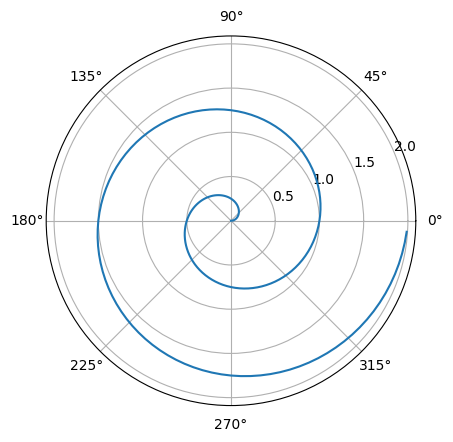

In [9]:
#| label: fig-polar
#| fig-cap: "A line plot on a polar axis"
#| include: false
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
fig, ax = plt.subplots(
  subplot_kw = {'projection': 'polar'} 
)
ax.plot(theta, r)
ax.set_rticks([0.5, 1, 1.5, 2])
ax.grid(True)
plt.show()

In [10]:
#| label: tbl-planet-measures
#| tbl-cap: Astronomical object
#| include: false
from IPython.display import Markdown
from tabulate import tabulate
table = [["Sun","696,000",1.989e30],
         ["Earth","6,371",5.972e24],
         ["Moon","1,737",7.34e22],
         ["Mars","3,390",6.39e23]]
Markdown(tabulate(
  table, 
  headers=["Astronomical object","R (km)", "mass (kg)"]
))

Astronomical object    R (km)      mass (kg)
---------------------  --------  -----------
Sun                    696,000     1.989e+30
Earth                  6,371       5.972e+24
Moon                   1,737       7.34e+22
Mars                   3,390       6.39e+23